# Project:- Get  Me Some Credit

Problem Statement:- To predict the probability that somebody will experience finanacial distree in the next two years
    The goal of this project is to build a model that borrowers can use to help make the best financial decision

In [2]:
# Import  Python libraries: 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Importing the train & test dataset
train = pd.read_csv('cs-training.csv',index_col=0)
test = pd.read_csv('cs-test.csv',index_col=0)

* To reduced memory usage

In [4]:
 def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        name =df[col].dtype.name
        
        if col_type != object and col_type.name != 'category':
        #if name != "category":    
           
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df
train= reduce_mem_usage(train)
test= reduce_mem_usage(test)
    

Memory usage of dataframe is 13.73 MB
Memory usage after optimization is: 3.86 MB
Decreased by 71.9%
Memory usage of dataframe is 9.29 MB
Memory usage after optimization is: 3.29 MB
Decreased by 64.6%


In [5]:
train


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766113,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957031,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658203,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233765,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907227,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040680,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299805,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246094,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [6]:
test

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885742,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463379,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043274,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280273,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101499,NaN,0.282715,24,0,0.068522,1400.0,5,0,0,0,0.0
101500,NaN,0.922363,36,3,0.934217,7615.0,8,0,2,0,4.0
101501,NaN,0.081604,70,0,836.000000,NaN,3,0,0,0,NaN
101502,NaN,0.335449,56,0,3568.000000,NaN,8,0,2,1,3.0


In [7]:
print(train.shape)
print(test.shape)

(150000, 11)
(101503, 11)


 In the dataset provided there are :
  1. Train dataset-150000
  2. Test dataset-101503

In [8]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.0
mean,0.066840,NaN,52.295207,0.421033,352.825867,6.670017e+03,8.452760,0.265973,1.018240,0.240387,NaN
std,0.249746,NaN,14.771866,4.192781,2038.782471,1.438386e+04,5.145951,4.169304,1.129771,4.155179,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.029861,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.154175,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.0
75%,0.000000,0.559082,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.0
max,1.000000,50720.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.0


#The train & test dataset  provide the following information:
-Age (in years)
-Monthly income of a borrower
-Number of Dependents 
-Number of Real estate loans including home equity lines of credit
-Number of Open loans 
-Debt to income ratio 
-Revolving Utilization of Unsecured Lines (Total balance on Credit cards and Personal lines of Credit divided by sum of Credit Limits).

#Payment pattern variables of the Borrower : 
-Number of time 30–59 days past due but not worse (Number of Times a borrower has made late payments for more than 1month but less than 2 months), 
-Number of time 60–89 days past due but not worse (Number of Times a borrower has made late payments for more than 2 months but less than 3 months)
-Number of time 90 days late (Number of Times a borrower has made late payments for more than 3 months).

As the Target variable is SeriousDlquin2year 
- Supervised machine learning Problem. 
- Class label represents whether a given borrower will pay back his/her credit within 90 days (eventually becoming a defaulter). Thus, for a given borrower, using the given features we have to predict the class label.
- The dataset is highly imbalanced with the majority of the classes are negatives (0’s) and positives (1's).

In [9]:
test.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.0
mean,NaN,NaN,52.405436,0.453770,344.339722,6.854857e+03,8.453514,0.296691,1.013074,0.270317,NaN
std,NaN,NaN,14.779756,4.538487,1631.990845,3.650628e+04,5.144100,4.515859,1.110253,4.503578,0.0
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,NaN,0.030136,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.0
50%,NaN,0.152588,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.0
75%,NaN,0.564209,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.0
max,NaN,21824.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int8   
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float16
 2   age                                   150000 non-null  int8   
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int8   
 4   DebtRatio                             150000 non-null  float32
 5   MonthlyIncome                         120269 non-null  float32
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int8   
 7   NumberOfTimes90DaysLate               150000 non-null  int8   
 8   NumberRealEstateLoansOrLines          150000 non-null  int8   
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int8   
 10  NumberOfDependents                    146076 non-null  float16
dtype

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float16
 2   age                                   101503 non-null  int8   
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int8   
 4   DebtRatio                             101503 non-null  float32
 5   MonthlyIncome                         81400 non-null   float32
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int8   
 7   NumberOfTimes90DaysLate               101503 non-null  int8   
 8   NumberRealEstateLoansOrLines          101503 non-null  int8   
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int8   
 10  NumberOfDependents                    98877 non-null   float16
dtype

In [12]:
train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

# Exploratory Data Analysis

--SeriousDlqin2yrs variable takes 2 values in training dataset which is what expected 0 & 1.


In [13]:
#Checking null values
train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

Train dataset missing values:
-NumberOfDependents & MonthlyIncome features 

In [14]:
test.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

Test dataset missing value:
-NumberOfDependents & MonthlyIncome Feature 
-SeriousDlqin2yrs i.e the target feature   

In [15]:
train.isnull().sum()/train.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

In [16]:
train['MonthlyIncome'] = train['MonthlyIncome'].fillna(train['MonthlyIncome'].mean())

In [17]:
train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766113,45,2,0.802982,9120.00000,13,0,6,0,2.0
2,0,0.957031,40,0,0.121876,2600.00000,4,0,0,0,1.0
3,0,0.658203,38,1,0.085113,3042.00000,2,1,0,0,0.0
4,0,0.233765,30,0,0.036050,3300.00000,5,0,0,0,0.0
5,0,0.907227,49,1,0.024926,63588.00000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040680,74,0,0.225131,2100.00000,4,0,1,0,0.0
149997,0,0.299805,44,0,0.716562,5584.00000,4,0,1,0,2.0
149998,0,0.246094,58,0,3870.000000,6670.01709,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.00000,4,0,0,0,0.0


In [18]:
train = train.dropna()

In [19]:
train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766113,45,2,0.802982,9120.00000,13,0,6,0,2.0
2,0,0.957031,40,0,0.121876,2600.00000,4,0,0,0,1.0
3,0,0.658203,38,1,0.085113,3042.00000,2,1,0,0,0.0
4,0,0.233765,30,0,0.036050,3300.00000,5,0,0,0,0.0
5,0,0.907227,49,1,0.024926,63588.00000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040680,74,0,0.225131,2100.00000,4,0,1,0,0.0
149997,0,0.299805,44,0,0.716562,5584.00000,4,0,1,0,2.0
149998,0,0.246094,58,0,3870.000000,6670.01709,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.00000,4,0,0,0,0.0


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146076 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      146076 non-null  int8   
 1   RevolvingUtilizationOfUnsecuredLines  146076 non-null  float16
 2   age                                   146076 non-null  int8   
 3   NumberOfTime30-59DaysPastDueNotWorse  146076 non-null  int8   
 4   DebtRatio                             146076 non-null  float32
 5   MonthlyIncome                         146076 non-null  float32
 6   NumberOfOpenCreditLinesAndLoans       146076 non-null  int8   
 7   NumberOfTimes90DaysLate               146076 non-null  int8   
 8   NumberRealEstateLoansOrLines          146076 non-null  int8   
 9   NumberOfTime60-89DaysPastDueNotWorse  146076 non-null  int8   
 10  NumberOfDependents                    146076 non-null  float16
dtype

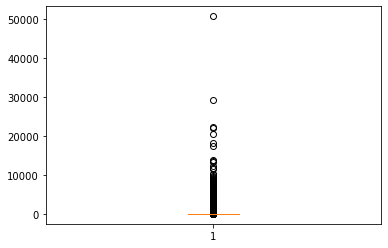

count    146076.000000
mean               NaN
std                NaN
min           0.000000
25%           0.031021
50%           0.158813
75%           0.563477
max       50720.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [21]:
plt.boxplot(train['RevolvingUtilizationOfUnsecuredLines'])
plt.show()
train['RevolvingUtilizationOfUnsecuredLines'].describe()

#RevolvingUtilizationOfUnsecuredLines
- Defined as ratio of the total amount of money owed to total credit limit
- It is expected that as this value increases, the proportion of people defaulting should increase as well
- RevolvingUtilizationOfUnsecuredLines has extremely skewed distribution towards the right end of the distribution in both training and testing dataset. 
- So we have to fix the probably by removing those observations where RevolvingUtilizationOfUnsecuredLines > 1.0929 in both training and testing datasets.

In [22]:

q1=train['RevolvingUtilizationOfUnsecuredLines'].quantile(0.25)

q3=train['RevolvingUtilizationOfUnsecuredLines'].quantile(0.75)

iqr=q3-q1

low=q1-1.5*iqr

up=q3+1.5*iqr


In [23]:
train=train[(train['RevolvingUtilizationOfUnsecuredLines']>low) & (train['RevolvingUtilizationOfUnsecuredLines']< up)]

In [24]:
train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766113,45,2,0.802982,9120.00000,13,0,6,0,2.0
2,0,0.957031,40,0,0.121876,2600.00000,4,0,0,0,1.0
3,0,0.658203,38,1,0.085113,3042.00000,2,1,0,0,0.0
4,0,0.233765,30,0,0.036050,3300.00000,5,0,0,0,0.0
5,0,0.907227,49,1,0.024926,63588.00000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040680,74,0,0.225131,2100.00000,4,0,1,0,0.0
149997,0,0.299805,44,0,0.716562,5584.00000,4,0,1,0,2.0
149998,0,0.246094,58,0,3870.000000,6670.01709,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.00000,4,0,0,0,0.0


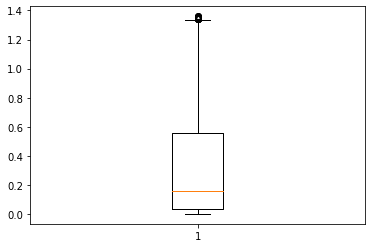

count    145346.000000
mean          0.319580
std           0.349609
min           0.000000
25%           0.030716
50%           0.156494
75%           0.553711
max           1.360352
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [25]:

plt.boxplot(train['RevolvingUtilizationOfUnsecuredLines'])
plt.show()
train['RevolvingUtilizationOfUnsecuredLines'].describe()

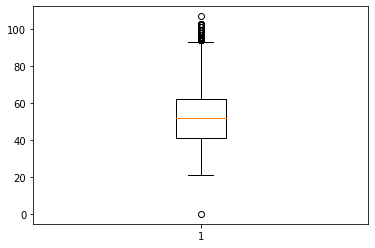

count    145346.000000
mean         52.131128
std          14.604152
min           0.000000
25%          41.000000
50%          52.000000
75%          62.000000
max         107.000000
Name: age, dtype: float64

In [26]:
plt.boxplot(train['age'])
plt.show()
train['age'].describe()

- Minimum age in train dataset is 0, which is not acceptable,as no credit agency will give loan to just born i.e Age=0
- Also 99% of the people are having and age < 87 years but there are only 1% of the people who are having an age > 87 years in both the datasets. So it's best to cap the upper tail of the Age distribution as well.

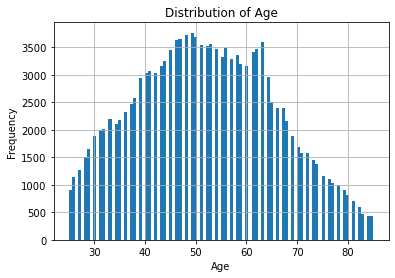

In [27]:
# Distribution of Age after removing maximum value & minimum value in the variable in train dataset
train.loc[(train['age'] > train['age'].quantile(0.01)) & (train['age'] < train['age'].quantile(0.99)),"age"].hist(bins=100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age');

* Now the distributions look like normal.

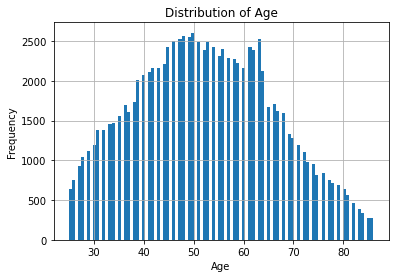

In [28]:
# Distribution of Age after removing maximum value & minimum value in the variable in testing dataset
test.loc[(test['age'] > test['age'].quantile(0.01)) & (test['age'] < test['age'].quantile(0.99)),"age"].hist(bins=100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age');

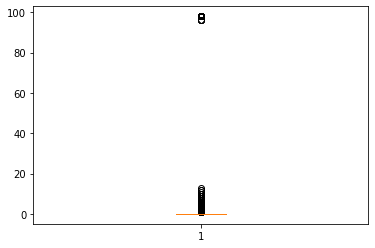

count    145346.000000
mean          0.406485
std           4.012010
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

In [29]:
#Number of Time Past Due Not Worse

plt.boxplot(train['NumberOfTime30-59DaysPastDueNotWorse'])
plt.show()
train['NumberOfTime30-59DaysPastDueNotWorse'].describe()


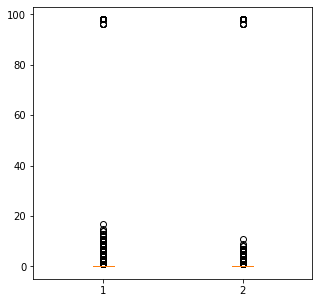

In [30]:
fig=plt.figure(figsize=(5,5))
a=fig.add_subplot(1,1,1)
a.boxplot([train['NumberOfTimes90DaysLate'],train['NumberOfTime60-89DaysPastDueNotWorse']])
plt.show()

In [31]:
train = train[train['NumberOfTime30-59DaysPastDueNotWorse']<80]
train = train[train['NumberOfTimes90DaysLate']<80]
train = train[train['NumberOfTime60-89DaysPastDueNotWorse']<80]

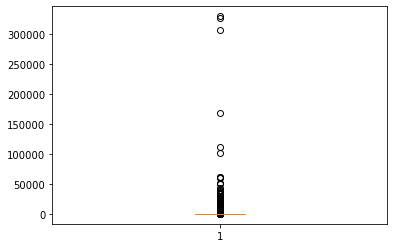

count    145108.000000
mean        333.914642
std        1947.204346
min           0.000000
25%           0.172827
50%           0.358269
75%           0.766260
max      329664.000000
Name: DebtRatio, dtype: float64

In [32]:
# Debt Ratio

plt.boxplot(train['DebtRatio'])
plt.show()
train['DebtRatio'].describe()

In [33]:
q1=train['DebtRatio'].quantile(0.25) 
q3=train['DebtRatio'].quantile(0.75) 
iqr=q3-q1
low=q1-1.5*iqr
up=q3+1.5*iqr
train=train[(train['DebtRatio']>low) & (train['DebtRatio']< up)]

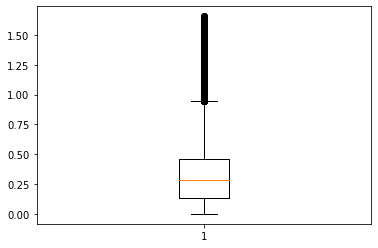

count    117049.000000
mean          0.331573
std           0.273580
min           0.000000
25%           0.134028
50%           0.284652
75%           0.458452
max           1.655672
Name: DebtRatio, dtype: float64

In [34]:
plt.boxplot(train['DebtRatio'])
plt.show()
train['DebtRatio'].describe()


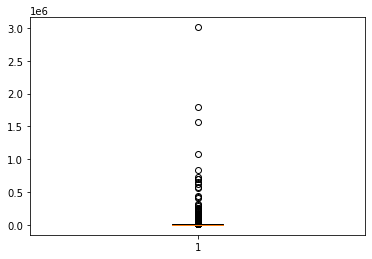

count    1.170490e+05
mean     6.857462e+03
std      1.453073e+04
min      0.000000e+00
25%      3.583000e+03
50%      5.555000e+03
75%      8.333000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [35]:
# MontylyIncome

plt.boxplot(train['MonthlyIncome'])
plt.show()
train['MonthlyIncome'].describe()


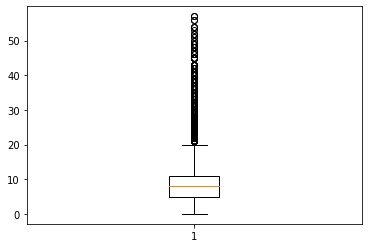

count    117049.000000
mean          8.703415
std           5.171664
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          57.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [36]:
# Number of Open Credit Lines And Loans
plt.boxplot(train['NumberOfOpenCreditLinesAndLoans'])
plt.show()
train['NumberOfOpenCreditLinesAndLoans'].describe()


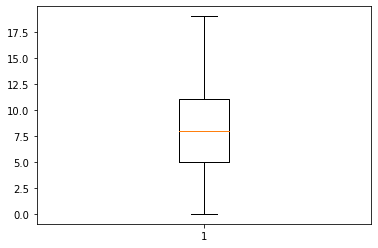

count    112745.000000
mean          8.133177
std           4.259480
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [37]:
q1=train['NumberOfOpenCreditLinesAndLoans'].quantile(0.25)  
q3=train['NumberOfOpenCreditLinesAndLoans'].quantile(0.75)  
iqr=q3-q1
low=q1-1.5*iqr
up=q3+1.5*iqr
train=train[(train['NumberOfOpenCreditLinesAndLoans']>low) & (train['NumberOfOpenCreditLinesAndLoans']< up)]


plt.boxplot(train['NumberOfOpenCreditLinesAndLoans'])
plt.show()
train['NumberOfOpenCreditLinesAndLoans'].describe()


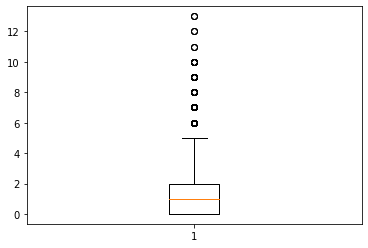

count    112745.000000
mean          0.994652
std           1.034304
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          13.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [38]:
# Number Real Estate Loans Or Lines
plt.boxplot(train['NumberRealEstateLoansOrLines'])
plt.show()
train['NumberRealEstateLoansOrLines'].describe()

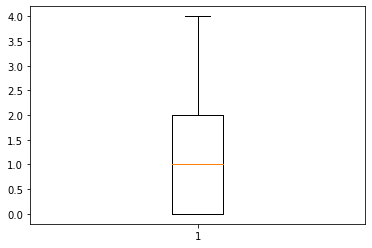

count    111925.000000
mean          0.958490
std           0.940224
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [39]:
q1=train['NumberRealEstateLoansOrLines'].quantile(0.25)  
q3=train['NumberRealEstateLoansOrLines'].quantile(0.75)  
iqr=q3-q1
low=q1-1.5*iqr
up=q3+1.5*iqr
train=train[(train['NumberRealEstateLoansOrLines']>low) & (train['NumberRealEstateLoansOrLines']< up)]


plt.boxplot(train['NumberRealEstateLoansOrLines'])
plt.show()
train['NumberRealEstateLoansOrLines'].describe()

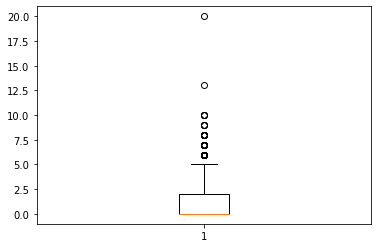

count    111925.0
mean          NaN
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           2.0
max          20.0
Name: NumberOfDependents, dtype: float64

In [40]:
# NumberOfDependents

plt.boxplot(train['NumberOfDependents'])
plt.show()
train['NumberOfDependents'].describe()

# Distribution of various Features using Histogram

array([[<AxesSubplot:title={'center':'SeriousDlqin2yrs'}>,
        <AxesSubplot:title={'center':'RevolvingUtilizationOfUnsecuredLines'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'NumberOfTime30-59DaysPastDueNotWorse'}>,
        <AxesSubplot:title={'center':'DebtRatio'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'NumberOfOpenCreditLinesAndLoans'}>,
        <AxesSubplot:title={'center':'NumberOfTimes90DaysLate'}>,
        <AxesSubplot:title={'center':'NumberRealEstateLoansOrLines'}>],
       [<AxesSubplot:title={'center':'NumberOfTime60-89DaysPastDueNotWorse'}>,
        <AxesSubplot:title={'center':'NumberOfDependents'}>,
        <AxesSubplot:>]], dtype=object)

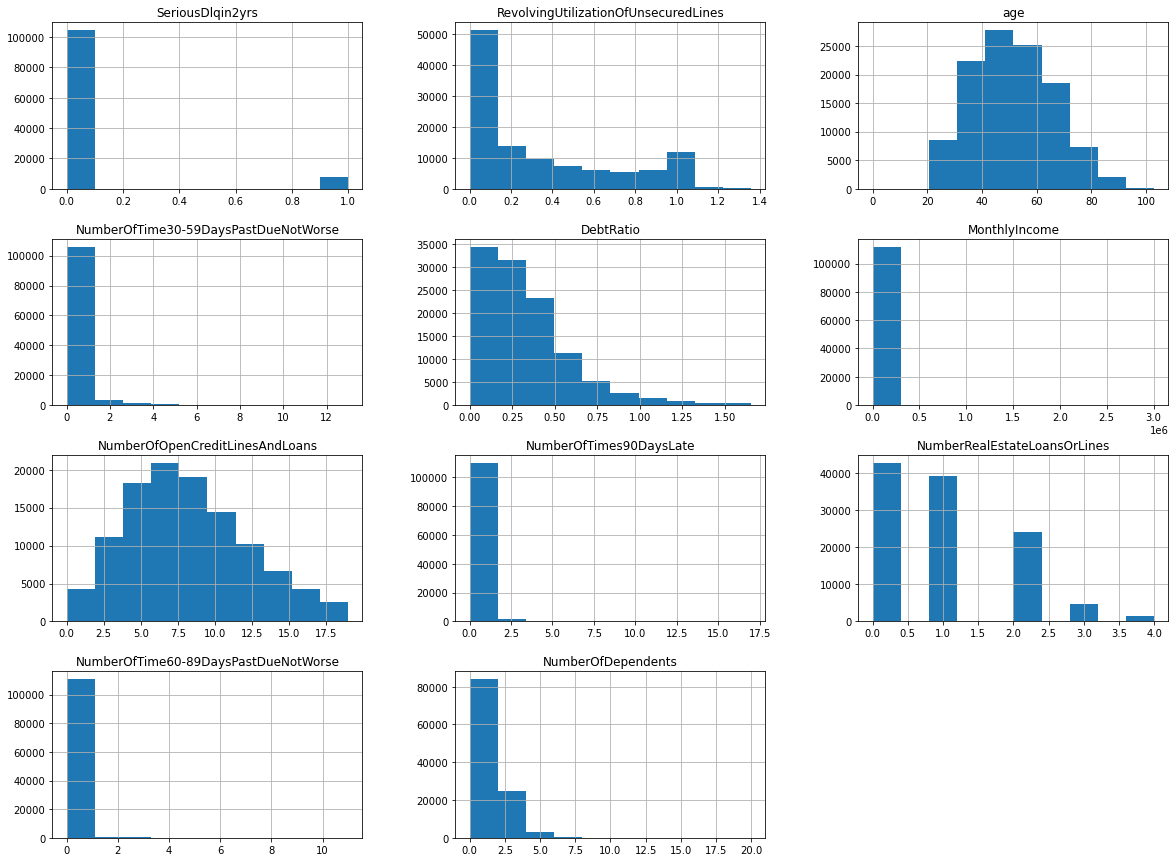

In [41]:
train.hist(figsize=(20,15))

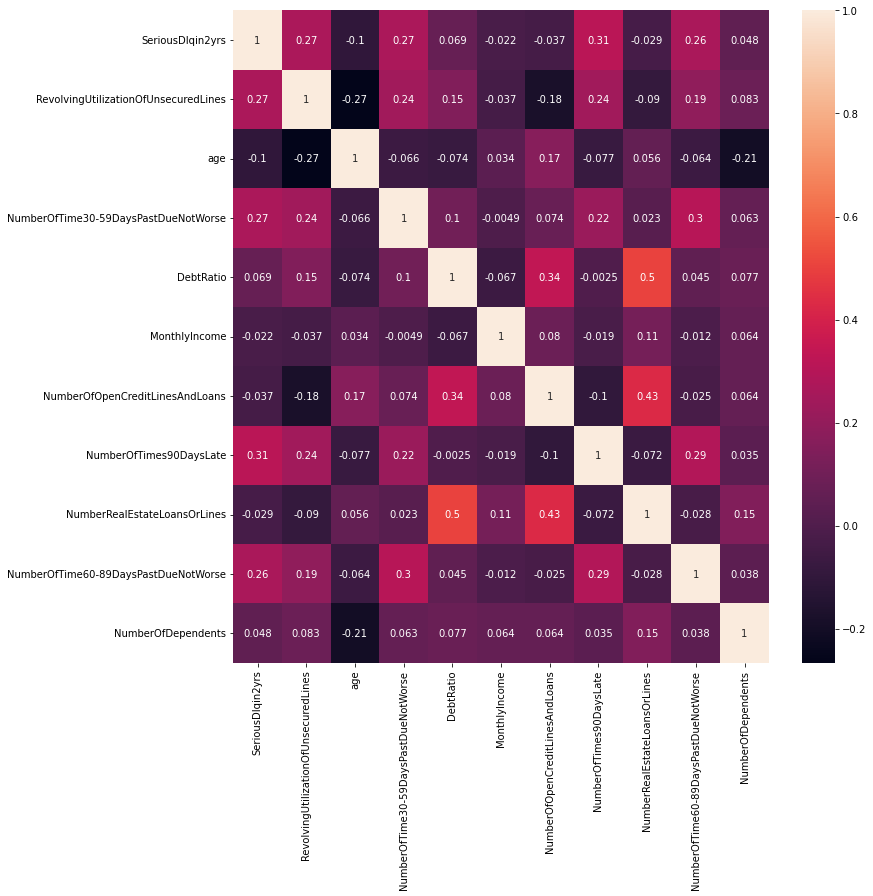

In [42]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(),annot=True);

Conclusion:
- All the independent features are very less correlated with Dependent variable.
- NumberRealEstateLoansOrLines & NumberOfOpenCreditLinesAndLoans are highly correlated with each other.
- The late payment variables are highly positively correlated with each other i.e., if a borrower has been 30-59 days late in making the payment then he is also 60-89 days and 90 days late in making the payment.

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

#Seperating independent & dependent features

In [44]:
x = train.drop(['SeriousDlqin2yrs'],axis=1)
y = train['SeriousDlqin2yrs']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 20)

In [45]:
rf = RandomForestClassifier()
result = cross_val_score(rf,x_train,y_train,scoring='roc_auc',cv=StratifiedKFold(n_splits=10))
rfAuc = result.mean()
rfAuc

0.8256813096202116

In [46]:
svc = SVC()
result = cross_val_score(svc,x_train,y_train,scoring='roc_auc',cv=StratifiedKFold(n_splits=10))
sucAuc = result.mean()
sucAuc

0.5358467885717411

In [47]:
tree = DecisionTreeClassifier()
result = cross_val_score(tree,x_train,y_train,scoring='roc_auc',cv=StratifiedKFold(n_splits=10))
treeAuc = result.mean()
treeAuc

0.6047658418816603

In [48]:
perceptron = Perceptron()
result = cross_val_score(perceptron,x_train,y_train,scoring='roc_auc',cv=StratifiedKFold(n_splits=10))
perceptronAuc = result.mean()
perceptronAuc

0.5860095060757884

In [ ]:
#!pip install xgboost

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [50]:
import xgboost as xgb
from sklearn import metrics
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [51]:
xg = XGBClassifier()
result = cross_val_score(xg,x_train,y_train,scoring='roc_auc',cv=StratifiedKFold(n_splits=10))
xgAuc = result.mean()
xgAuc

0.8404313698822483

In [52]:
xgb1 = XGBClassifier(n_estimators = 1000, max_depth = 5, learning_rate = 0.1, objective = 'binary:logistic')


In [61]:
xgb1Auc = result.mean()
xgb1Auc

0.8404313698822483

In [58]:
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [62]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'Support Vector Machines', 'Perceptron', 
              'Decision Tree', 'xg','xgb1'],
    'CV-Auc': [rfAuc, sucAuc, perceptronAuc,treeAuc,xgAuc,xgb1Auc]
})
models.sort_values(by='CV-Auc', ascending=False)

,Model,CV-Auc
4,xg,0.840431
5,xgb1,0.840431
0,Random Forest,0.825681
3,Decision Tree,0.604766
2,Perceptron,0.586010
1,Support Vector Machines,0.535847


In [55]:
df_test_X = test.drop(['SeriousDlqin2yrs'], axis = 1)
X_df_test = scaler.transform(df_test_X)
submission_proba = xgb1.predict_proba(X_df_test)
submission_scores = submission_proba[:, 1]
submission_scores.shape

(101503,)

In [56]:
ids = np.arange(1, 101503)
submission = pd.DataFrame({ 'Probability': submission_scores})
submission.to_csv('final.csv', index = False)

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

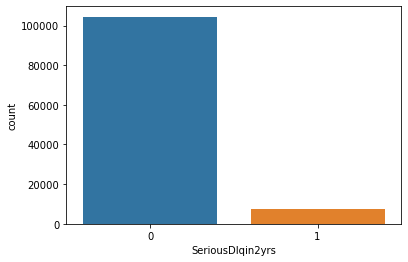

In [57]:
sns.countplot(y)

* Conclusion : 
- XGBoost gave an AUC score of on the Training Dataset is Testing dataset are nearly same.
- We see as compared to other model XGBoost are doing well on the testing dataset Hence, I’m choosing the XGBoost model as the final model.